In [20]:
import numpy as np
import pandas as pd
import gudhi
import matplotlib.pyplot as plt
from pprint import pprint as print
import os

In [21]:
def read_data(book):
    data_t0 = pd.read_csv('./distances/' + f'{book}_t0.csv')
    data_t0 = np.array(data_t0)

    data_t1 = pd.read_csv('./distances/' + f'{book}_tplus1.csv')
    data_t1 = np.array(data_t1)

    data_tminus1 = pd.read_csv('./distances/' + f'{book}_tminus1.csv')
    data_tminus1 = np.array(data_tminus1)

    #drop the first row with character names
    data_t0 = data_t0[:, 1:]
    data_t1 = data_t1[:, 1:]
    data_tminus1 = data_tminus1[:, 1:]
    
    return data_t0, data_t1, data_tminus1

In [26]:
def draw_diagrams(book, data_t0, data_t1, data_tminus1):
    rips_complex = gudhi.RipsComplex(distance_matrix = data_t0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    bar_codes = simplex_tree.persistence()
    ax_t0 = gudhi.plot_persistence_diagram(bar_codes)
    ax_t0.set_title(f'{book}_t0')
    plt.savefig('./persistence diagrams/' + f'{book}_t0' + ".png")

    rips_complex = gudhi.RipsComplex(distance_matrix = data_t1)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    bar_codes = simplex_tree.persistence()
    ax_t1 = gudhi.plot_persistence_diagram(bar_codes)
    ax_t1.set_title(f'{book}_tplus1')
    plt.savefig('./persistence diagrams/' + f'{book}_tplus1' + ".png")

    rips_complex = gudhi.RipsComplex(distance_matrix = data_tminus1)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    bar_codes = simplex_tree.persistence()
    ax_tminus1 = gudhi.plot_persistence_diagram(bar_codes)
    ax_tminus1.set_title(f'{book}_tminus1')
    plt.savefig('./persistence diagrams/' + f'{book}_tminus1' + ".png")

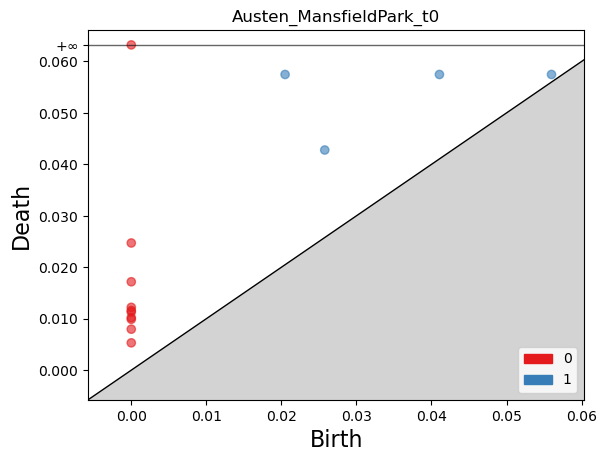

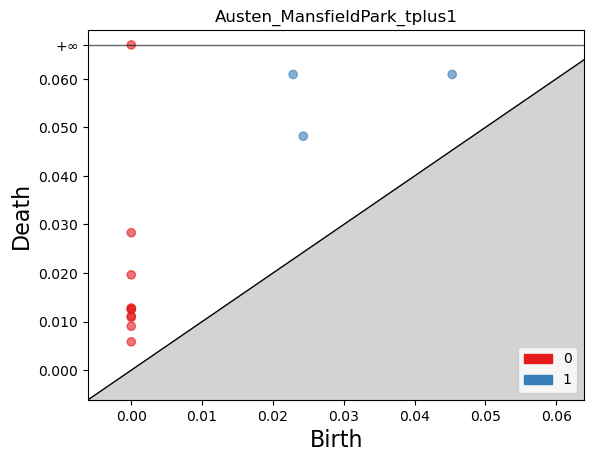

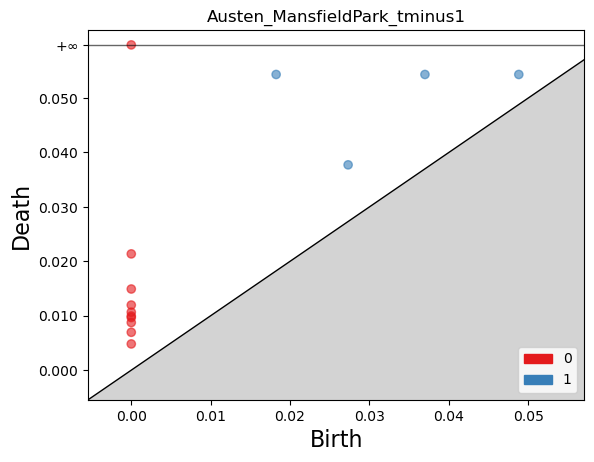

In [27]:
folder_path = './books/'

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        #remove .txt
        book = filename[:-4]
        
        #continue if the diagram was previously drawn
        if (os.path.exists(f"./persistence diagrams/{book}_t0.png")):
            continue
        
        data_t0, data_t1, data_tminus1 = read_data(book)
        draw_diagrams(book, data_t0, data_t1, data_tminus1)